In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('wearable_tech_sleep_quality_1.csv')
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


# 1) Линейная регрессия и коэффициент корреляции

In [ ]:
df1 = df.filter(['Sleep_Quality_Score', 'Caffeine_Intake_mg','Light_Exposure_hours'])
pd.plotting.scatter_matrix(df1, alpha=0.5, diagonal='kde', figsize=(8,8))

,Sleep_Quality_Score,Caffeine_Intake_mg,Light_Exposure_hours
0,1.000000,107.624032,7.933949
1,1.000000,104.658589,6.992699
2,10.000000,0.000000,7.655250
3,1.000000,116.990981,9.429463
4,1.000000,223.282908,10.555713
...,...,...,...
995,1.000000,167.146932,8.203260
996,1.000000,265.264810,10.334435
997,8.445252,28.259621,11.176894
998,1.000000,196.795042,6.630026


array([[<Axes: xlabel='Sleep_Quality_Score', ylabel='Sleep_Quality_Score'>,
        <Axes: xlabel='Caffeine_Intake_mg', ylabel='Sleep_Quality_Score'>,
        <Axes: xlabel='Light_Exposure_hours', ylabel='Sleep_Quality_Score'>],
       [<Axes: xlabel='Sleep_Quality_Score', ylabel='Caffeine_Intake_mg'>,
        <Axes: xlabel='Caffeine_Intake_mg', ylabel='Caffeine_Intake_mg'>,
        <Axes: xlabel='Light_Exposure_hours', ylabel='Caffeine_Intake_mg'>],
       [<Axes: xlabel='Sleep_Quality_Score', ylabel='Light_Exposure_hours'>,
        <Axes: xlabel='Caffeine_Intake_mg', ylabel='Light_Exposure_hours'>,
        <Axes: xlabel='Light_Exposure_hours', ylabel='Light_Exposure_hours'>]],
      dtype=object)

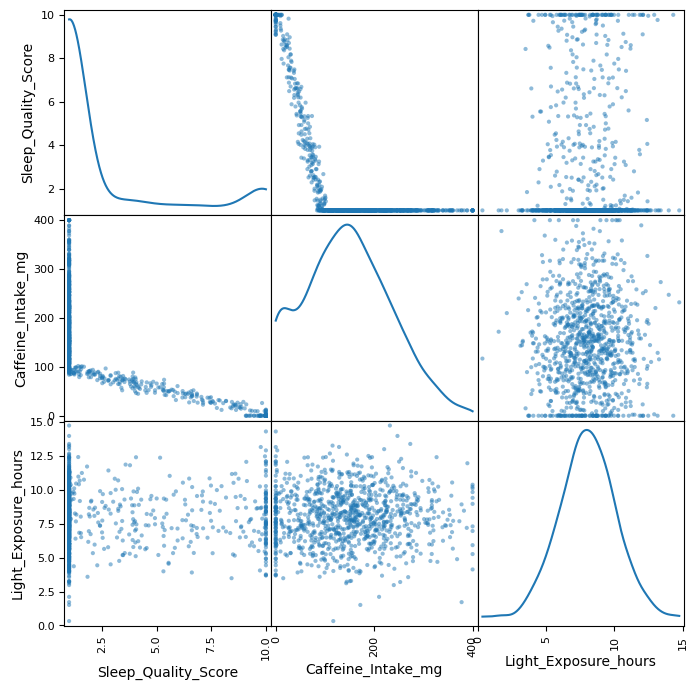

In [ ]:
pd.plotting.scatter_matrix(df1, alpha=0.5, diagonal='kde', figsize=(8,8))

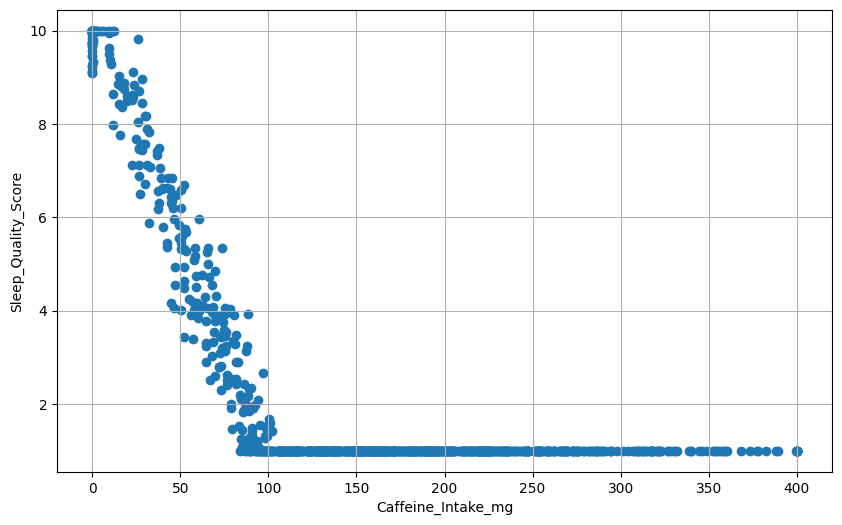

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Caffeine_Intake_mg'], df['Sleep_Quality_Score'])
plt.ylabel('Sleep_Quality_Score')
plt.xlabel('Caffeine_Intake_mg')
plt.grid()

In [ ]:
X = df['Caffeine_Intake_mg']
y = df['Sleep_Quality_Score']

In [ ]:
X_cut = df['Caffeine_Intake_mg'][df['Caffeine_Intake_mg'] <= 100]
y_cut = df['Sleep_Quality_Score'][df['Caffeine_Intake_mg'] <= 100]

In [ ]:
a = np.sum((y - y.mean()) * X) / np.sum((X - X.mean()) * X)
b = y.mean() - a * X.mean()
print('Regression coefficient: %.5f' % a)
print('Intercept: %.5f' % b)

Regression coefficient: -0.02288
Intercept: 5.98460


In [ ]:
a_1 = np.sum((y_cut - y_cut.mean()) * X_cut) / np.sum((X_cut - X_cut.mean()) * X_cut)
b_1 = y_cut.mean() - a_1 * X_cut.mean()

print('Regression coefficient: %.5f' % a_1)
print('Intercept: %.5f' % b_1)

Regression coefficient: -0.09239
Intercept: 10.05448


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#define predictor and response variables
X = df['Caffeine_Intake_mg'].values.reshape(-1, 1)
y = df['Sleep_Quality_Score']

#fit regression model
model.fit(X, y)

LinearRegression()

In [ ]:
print('Regression coefficient: %.5f' % model.coef_)
print('Intercept: %.5f' % model.intercept_)

Regression coefficient: -0.02288
Intercept: 5.98460


In [ ]:
X = df['Caffeine_Intake_mg']
corr_matrix = np.corrcoef(X, y)
r0 = corr_matrix[0][1]
print('Correlation coefficient: %.3f' % r0)

Correlation coefficient: -0.722


In [ ]:
model_1 = LinearRegression()

#define predictor and response variables
X_cut_reshaped = X_cut.values.reshape(-1, 1)
y_cut = df['Sleep_Quality_Score'][df['Caffeine_Intake_mg'] <= 100].reset_index(drop = True)

#fit regression model
model_1.fit(X_cut_reshaped, y_cut)

LinearRegression()

In [ ]:
print('Regression coefficient: %.5f' % model_1.coef_)
print('Intercept: %.5f' % model_1.intercept_)

corr_matrix_1 = np.corrcoef(X_cut, y_cut)
r0_1 = corr_matrix_1[0][1]
print('Correlation coefficient after trimming: %.3f' % r0_1)

Regression coefficient: -0.09239
Intercept: 10.05448
Correlation coefficient after trimming: -0.982


In [ ]:
from sklearn.metrics import r2_score

corr_matrix = np.corrcoef(X, y)
r0 = corr_matrix[0][1]
print('Correlation coefficient: %.3f' % r0)
X_reshaped = X.values.reshape(-1, 1)

y_pred = model.predict(X_reshaped)
r2 = r2_score(y, y_pred)
print('Determination coefficient: %.3f' % r2)

Determination coefficient: 0.521


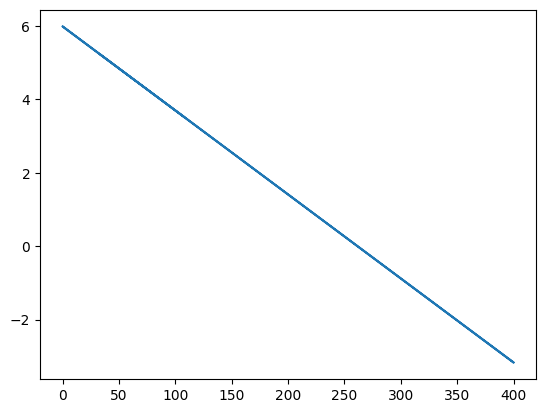

In [ ]:
plt.plot(X_reshaped, y_pred)

In [ ]:
X_cut_reshaped = X_cut.values.reshape(-1, 1)

y_pred_1 = model_1.predict(X_cut_reshaped)
r2_1 = r2_score(y_cut, y_pred_1)
print('Determination coefficient: %.3f' % r2_1)

Determination coefficient: 0.964


In [ ]:
N = 4

ix = np.random.choice(np.arange(N), 4, replace=False)
x_ix = X_reshaped[ix]
y_true_ix = y[ix]
y_pred_ix = y_pred[ix]

df_rand_obj = pd.DataFrame({
    'x_ix': x_ix.ravel(),
    'y_true_ix': y_true_ix.ravel() ,
    'y_pred_ix': y_pred_ix.ravel(),
})
df_rand_obj

,x_ix,y_true_ix,y_pred_ix
0,0.000000,10.0,5.984595
1,116.990981,1.0,3.308270
2,104.658589,1.0,3.590390
3,107.624032,1.0,3.522551


In [ ]:
err = np.mean(np.abs(y - y_pred) / y)

In [ ]:
err = np.mean(np.abs(y - y_pred) / y)
err

1.1611142097459528

In [ ]:
N = 4

ix_1 = np.random.choice(np.arange(N), 4, replace=False)
x_ix_1 = X_cut_reshaped[ix_1]
y_true_ix_1 = y_cut[ix_1]
y_pred_ix_1 = y_pred_1[ix_1]
errors_1 = (y_true_ix_1 - y_pred_ix_1) / y_true_ix_1
df_rand_obj_1 = pd.DataFrame({
    'x_ix': x_ix_1.ravel(),
    'y_true_ix': y_true_ix_1.ravel() ,
    'y_pred_ix': y_pred_ix_1.ravel(),
    'error': errors_1
})
df_rand_obj_1


,x_ix,y_true_ix,y_pred_ix,error
3,98.823644,1.485861,0.924534,0.377779
2,76.576668,2.409237,2.979850,-0.236844
0,0.000000,10.000000,10.054484,-0.005448
1,22.576788,7.122153,7.968698,-0.118861


In [ ]:
df_rand_obj_1 = pd.DataFrame({
    'x_ix': x_ix_1.ravel(),
    'y_true_ix': y_true_ix_1.ravel() ,
    'y_pred_ix': y_pred_ix_1.ravel()
})
df_rand_obj_1

,x_ix,y_true_ix,y_pred_ix
0,98.823644,1.485861,0.924534
1,76.576668,2.409237,2.979850
2,0.000000,10.000000,10.054484
3,22.576788,7.122153,7.968698


In [ ]:
err_1 = np.mean(np.abs(y_cut - y_pred_1) / y_cut)
err_1

0.15045451506296778

In [ ]:
d = abs(y - y_pred)
dda = d/abs(y)
dml = d/abs(y_pred)
eda = np.mean(dda)
eml = np.mean(dml)


eda, eml

(1.1611142097459528, 1.5501539611992756)

In [ ]:
y_pred.min()

-3.165940078927168

In [ ]:
dml.min()

-176.80016641082872

In [ ]:
d_1 = abs(y_cut - y_pred_1)
dda_1 = d_1/y_cut
dml_1 = d_1/abs(y_pred_1)
eda_1 = np.mean(dda_1)
eml_1 = np.mean(dml_1)

eda_1, eml_1

(0.15045451506296778, 0.13617045167618588)

# МГК/SVD

Для выполнения данной домашней работы, авторами были выбраны признаки
Caffeine_Intake_mg, Bedtime_Consistency и Light_Exposure_hours. По мнению авторов они более или менее относятся
к одному и тому же аспекту данных (Все эти признаки являются показателями качества сна.).

In [ ]:
Heart_Rate_Variability	Body_Temperature Stress_Level

In [ ]:
df_dz2 = df[['Body_Temperature', 'Stress_Level', 'Heart_Rate_Variability']]
df_dz2

,Body_Temperature,Stress_Level,Heart_Rate_Variability
0,37.199678,2.771837,79.934283
1,36.962317,3.738138,67.234714
2,36.529815,3.115880,82.953771
3,36.176532,3.904008,100.460597
4,36.849112,4.571699,65.316933
...,...,...,...
995,37.035075,4.404266,64.377994
996,36.486739,6.538063,105.953731
997,36.059063,3.945222,82.816857
998,36.418467,4.989787,58.576420


In [ ]:
Xz = (df_dz2 - df_dz2.mean()) / df_dz2.std()
uz, sz, vhz = np.linalg.svd(Xz)

In [ ]:
sz

array([32.433019  , 31.63093313, 30.7340747 ])

In [ ]:
Xz.describe()

,Body_Temperature,Stress_Level,Heart_Rate_Variability
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,3.540279e-15,3.792522e-16,-8.792966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.018910e+00,-2.430725e+00,-3.329806e+00
25%,-6.788059e-01,-7.139394e-01,-6.810779e-01
50%,-7.778907e-03,-2.481852e-02,6.095240e-03
75%,6.597254e-01,7.175324e-01,6.419542e-01
max,3.130240e+00,2.488819e+00,3.914764e+00


In [ ]:
vhz

array([[ 0.52995143,  0.46053883, -0.71207828],
       [ 0.65881372, -0.75229672,  0.00376   ],
       [ 0.53396252,  0.47111955,  0.70209002]])

In [ ]:
pca1 = vhz[0]
pca2 = vhz[1]

array([ 0.52995143,  0.46053883, -0.71207828])

In [ ]:
pca2 = vhz[1]
pca2

array([ 0.65881372, -0.75229672,  0.00376   ])

In [ ]:
data_scatter = np.sum((Xz**2).values)
contributions = sz**2 /data_scatter

2997.0

In [ ]:
contributions = sz**2 /data_scatter
contributions

array([0.35098456, 0.33383915, 0.31517629])

In [ ]:
Xz.iloc[:, 1]

0     -1.067108
1     -0.591732
2     -0.897854
3     -0.510131
4     -0.181657
         ...   
995   -0.264027
996    0.785704
997   -0.489856
998    0.024022
999    0.421394
Name: Stress_Level, Length: 1000, dtype: float64

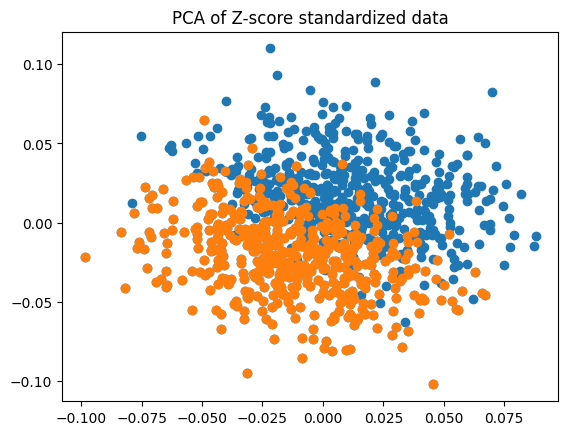

In [ ]:
Xz = (df_dz2 - df_dz2.mean()) / df_dz2.std()
uz, sz, vhz = np.linalg.svd(Xz)

uz0 = -uz[:, 0]
vhz0 = -vhz[0]
uz1 = uz[:, 1]

plt.scatter(uz0, uz1)
plt.scatter(uz0[Xz.iloc[:, 1].values > Xz.iloc[:, 1].mean()], uz1[Xz.iloc[:, 1].values > Xz.iloc[:, 1].mean()])
plt.title('PCA of Z-score standardized data')
plt.show()

In [ ]:
Xr = (df_dz2 - df_dz2.mean()) / (df_dz2.max() - df_dz2.min())
ur, sr, vhr = np.linalg.svd(Xr)

In [ ]:
Xr.describe()

,Body_Temperature,Stress_Level,Heart_Rate_Variability
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.746514e-16,7.704948e-17,-1.176836e-17
std,1.626241e-01,2.032708e-01,1.380344e-01
min,-4.909475e-01,-4.940956e-01,-4.596278e-01
25%,-1.103902e-01,-1.451231e-01,-9.401219e-02
50%,-1.265038e-03,-5.044882e-03,8.413529e-04
75%,1.072872e-01,1.458534e-01,8.861177e-02
max,5.090525e-01,5.059044e-01,5.403722e-01


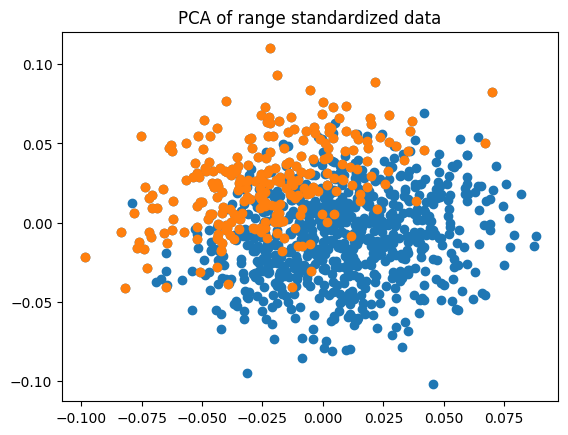

In [ ]:
Xr = (df_dz2 - df_dz2.mean()) / (df_dz2.max() - df_dz2.min())
ur, sr, vhr = np.linalg.svd(Xr)

ur0 = -uz[:, 0]
vhr0 = -vhz[0]
ur1 = uz[:, 1]

plt.scatter(ur0, ur1)
plt.scatter(ur0[Xr.iloc[:, 0].values > 0.2 * Xr.iloc[:, 0].max()], ur1[Xr.iloc[:, 0].values > 0.2 * Xr.iloc[:, 0].max()])
plt.title('PCA of range standardized data')
plt.show()

In [ ]:
N = Xz.shape[0]
cov = np.dot(Xz.T, Xz)/N

eigw, eigv = np.linalg.eig(cov)

pca1_e = np.dot(Xz, - eigv[:,0]) / np.sqrt(N * eigw[0])
pca1_e

array([-0.01791932, -0.00212428, -0.00070056, -0.01475771, -0.00222967,
       -0.01277817, -0.04635038, -0.00381246, -0.02328398,  0.01053014,
       -0.01001011,  0.00192797, -0.04356256,  0.04137585,  0.00401858,
        0.02390038,  0.00335657, -0.00059416,  0.03022478,  0.01226078,
       -0.04582142,  0.01047811, -0.03749931,  0.00131281, -0.01135834,
       -0.01070628,  0.01126817,  0.01310615,  0.03421055,  0.03471444,
        0.04440291, -0.00650128, -0.01297804,  0.02807644,  0.01198637,
        0.00125908,  0.00470827,  0.09802694,  0.01594424, -0.03391813,
       -0.0597084 , -0.01314285, -0.04806223,  0.01430538,  0.03708608,
        0.00892199,  0.0005938 , -0.01908354, -0.01220918,  0.03131751,
       -0.0161959 , -0.01205543,  0.01390324, -0.03045688, -0.01837362,
       -0.03141536,  0.02013891, -0.02744225, -0.05366246, -0.02408415,
       -0.00176724,  0.0442905 ,  0.01254922,  0.02343212, -0.01411866,
       -0.0067812 ,  0.03807427, -0.05893954, -0.01212973,  0.01

In [ ]:
eigv

array([[ 0.53396252,  0.65881372, -0.52995143],
       [ 0.47111955, -0.75229672, -0.46053883],
       [ 0.70209002,  0.00376   ,  0.71207828]])

In [ ]:
cov = cov - eigw[0] * eigv[:,0][:,None] * eigv[:,0]
eigw, eigv = np.linalg.eig(cov)
pca2_e = np.dot(Xz, eigv[:,0]) / np.sqrt(N * eigw[0])
pca2_e

/tmp/ipykernel_4294/4068026145.py:3: RuntimeWarning: invalid value encountered in sqrt
  pca2_e = np.dot(Xz, eigv[:,0]) / np.sqrt(N * eigw[0])


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

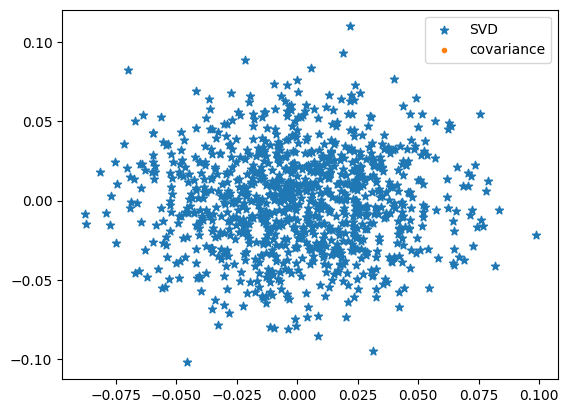

In [ ]:
plt.scatter(-uz0, uz1, marker='*', label='SVD')
plt.scatter(pca1_e, pca2_e, marker='.', label='covariance')
plt.legend()
plt.show()

# 3) Метод К-средних(Kmeans)


Sleep_Duration_Hours

Caffeine_Intake_mg

Stress_Level

K=5:

In [ ]:
from sklearn.cluster import KMeans


def make_clusters(data, n_clusters):
 inertias = []
 labels = []

 for i in range(10):
     kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1)
     kmeans.fit(data)
     inertias.append(kmeans.inertia_)
     labels.append(kmeans.labels_)

 x = np.linspace(0, 19, 10)
 plt.plot(x, inertias)
 plt.xlabel('number of init')
 plt.title('Inertia (sum of squared distances of samples to their closest cluster center)')
 plt.show()

 return inertias, labels

In [ ]:
df_stand = df[['Sleep_Duration_Hours', 'Caffeine_Intake_mg', 'Heart_Rate_Variability']]
df_stand = (df_stand - df_stand.mean()) / (df_stand.max() - df_stand.min())
inertias_5, labels_5 = make_clusters(df_stand, 5)

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability
0,-0.306047,-0.101590,0.067294
1,-0.136356,-0.109004,-0.022215
2,-0.063975,-0.370650,0.088576
3,0.308853,-0.078173,0.211968
4,0.093199,0.187557,-0.035732
...,...,...,...
995,0.007643,0.047217,-0.042350
996,-0.333589,0.292512,0.250684
997,-0.048858,-0.300001,0.087611
998,0.269273,0.121337,-0.083241


In [ ]:
df_stand.describe()

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.618528e-17,1.798561e-17,-1.176836e-17
std,1.664035e-01,2.350794e-01,1.380344e-01
min,-4.715609e-01,-3.706504e-01,-4.596278e-01
25%,-1.164352e-01,-1.690736e-01,-9.401219e-02
50%,3.062562e-03,-6.357138e-03,8.413529e-04
75%,1.110830e-01,1.574613e-01,8.861177e-02
max,5.284391e-01,6.293496e-01,5.403722e-01


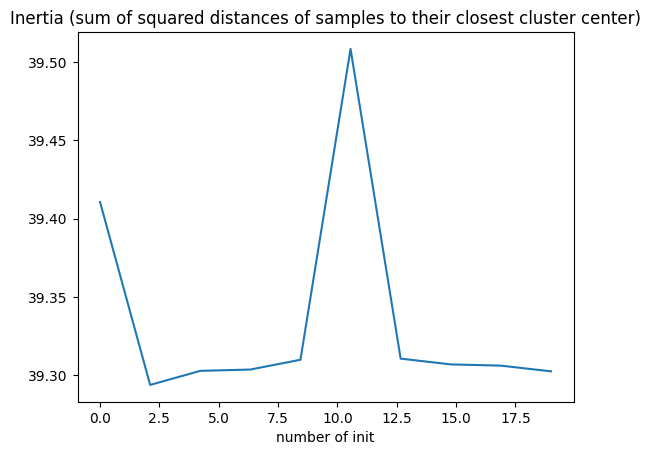

In [ ]:
inertias_5, labels_5 = make_clusters(df_stand, 5)

In [ ]:
inertias_5

[39.410665306623365,
 39.29370617805902,
 39.302695920973484,
 39.303538745978734,
 39.30980095093701,
 39.508554800776764,
 39.31051406110616,
 39.30683337836449,
 39.30603642684828,
 39.30239184075279]

In [ ]:
id_min = inertias_5.index(min(inertias_5))
id_min

1

In [ ]:
label = labels_5[id_min]
label

array([2, 2, 1, 4, 0, 1, 0, 2, 3, 2, 0, 0, 2, 3, 3, 3, 1, 0, 3, 3, 4, 1,
       2, 1, 0, 1, 1, 4, 0, 3, 1, 0, 0, 2, 0, 0, 0, 3, 0, 2, 4, 1, 2, 1,
       3, 2, 1, 2, 0, 3, 2, 2, 3, 2, 4, 1, 2, 3, 2, 2, 3, 0, 3, 1, 2, 4,
       4, 0, 4, 3, 1, 4, 0, 1, 3, 4, 4, 0, 4, 0, 1, 4, 2, 1, 0, 0, 4, 4,
       2, 1, 1, 4, 1, 0, 2, 3, 0, 1, 1, 3, 0, 3, 4, 3, 2, 4, 1, 4, 1, 2,
       3, 0, 2, 1, 3, 4, 0, 3, 1, 4, 1, 3, 4, 3, 0, 4, 2, 3, 3, 3, 3, 0,
       2, 4, 1, 4, 3, 2, 4, 3, 4, 2, 0, 2, 0, 4, 3, 3, 0, 2, 0, 1, 2, 1,
       1, 2, 2, 0, 3, 1, 3, 1, 2, 2, 2, 2, 1, 4, 1, 1, 2, 1, 2, 1, 2, 0,
       1, 1, 4, 4, 4, 3, 2, 2, 0, 1, 2, 4, 3, 0, 1, 4, 4, 3, 1, 2, 0, 2,
       1, 0, 4, 4, 4, 4, 0, 0, 0, 4, 1, 4, 4, 1, 4, 4, 3, 4, 2, 1, 2, 1,
       0, 3, 4, 3, 0, 1, 2, 3, 3, 0, 0, 2, 1, 4, 2, 0, 1, 0, 3, 0, 3, 4,
       2, 4, 0, 3, 3, 1, 0, 2, 3, 4, 4, 1, 3, 1, 2, 1, 1, 0, 0, 1, 3, 3,
       0, 3, 0, 3, 1, 0, 0, 0, 1, 0, 3, 4, 1, 1, 1, 3, 1, 0, 2, 3, 0, 3,
       1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 4, 2, 2, 4, 3,

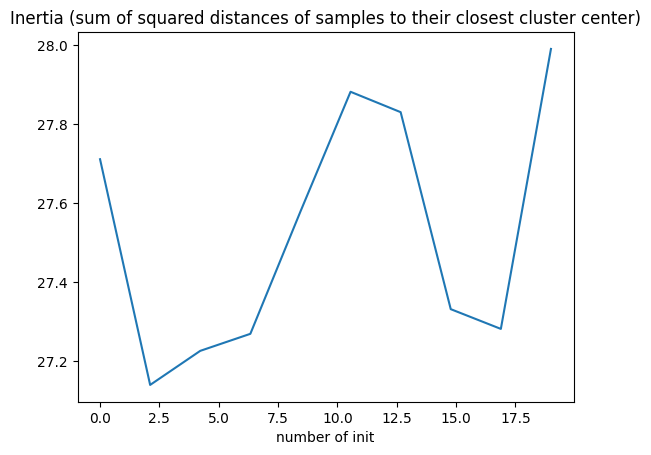

In [ ]:
inertias_9, labels_9 = make_clusters(df_stand, 9)

In [ ]:
df_full = df[['Sleep_Duration_Hours', 'Caffeine_Intake_mg', 'Heart_Rate_Variability']]
df_full

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability
0,4.638289,107.624032,79.934283
1,6.209422,104.658589,67.234714
2,6.879592,0.000000,82.953771
3,10.331531,116.990981,100.460597
4,8.334830,223.282908,65.316933
...,...,...,...
995,7.542686,167.146932,64.377994
996,4.383282,265.264810,105.953731
997,7.019553,28.259621,82.816857
998,9.965067,196.795042,58.576420


In [ ]:
def calculate_means(inertias, labels, n_clusters, data_stand,
data_full):
    ind_min = inertias.index(min(inertias))
    label = labels[ind_min]

    clusters = {}
    cluster_means = []

    for k in range(n_clusters):
        clusters['Cluster' + str(k)] = data_full.values[np.where(label== k)]

    for name_cluster in clusters:
        cluster_means.append(np.mean(clusters[name_cluster], axis=0))

    grand_mean = np.mean(data_full, axis=0).values

    means = pd.DataFrame(
    (cluster_means + [grand_mean]),
    (list(clusters.keys()) + ['Grand mean']),
    data_stand.columns
    )
    means.index.name = 'Means'

    num_objects = [len(v) for k, v in clusters.items()]

    relative_differences = 100 * np.divide(np.subtract(cluster_means, grand_mean), grand_mean)

    rel_dif = pd.DataFrame(
    relative_differences,
    clusters.keys(),
    data_stand.columns
    )
    rel_dif['Number of objects'] = num_objects
    rel_dif.index.name = 'Rel.dif %'

    return means.round(2), rel_dif.round(2), label

m5, rdiff5, label = calculate_means(inertias_5, labels_5, 5, df_stand,
df_full)
m5

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability
Means,,,
Cluster0,7.83,285.86,70.07
Cluster1,7.26,30.35,72.36
Cluster2,5.82,162.71,74.15
Cluster3,7.98,138.59,48.78
Cluster4,9.01,139.36,85.38
Grand mean,7.47,148.26,70.39


In [ ]:
rdiff5

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability,Number of objects
Rel.dif %,,,,
Cluster0,4.83,92.81,-0.46,195
Cluster1,-2.83,-79.53,2.80,228
Cluster2,-22.16,9.75,5.35,228
Cluster3,6.85,-6.52,-30.70,177
Cluster4,20.60,-6.00,21.31,172


In [ ]:
m9, rdiff9, label = calculate_means(inertias_9, labels_9, 9, df_stand,
df_full)
m9

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability
Means,,,
Cluster0,5.44,216.31,68.27
Cluster1,8.05,168.48,52.08
Cluster2,9.62,235.37,73.75
Cluster3,9.26,87.49,84.92
Cluster4,7.54,316.36,68.77
Cluster5,6.46,29.63,85.98
Cluster6,5.87,107.74,62.32
Cluster7,7.19,173.51,90.32
Cluster8,8.15,39.10,54.19


In [ ]:
rdiff9

,Sleep_Duration_Hours,Caffeine_Intake_mg,Heart_Rate_Variability,Number of objects
Rel.dif %,,,,
Cluster0,-27.20,45.90,-3.01,96
Cluster1,7.79,13.64,-26.01,141
Cluster2,28.74,58.75,4.78,82
Cluster3,23.88,-40.99,20.64,104
Cluster4,0.88,113.38,-2.29,98
Cluster5,-13.58,-80.02,22.15,97
Cluster6,-21.45,-27.33,-11.46,126
Cluster7,-3.84,17.03,28.32,133
Cluster8,9.07,-73.63,-23.01,123


# 4): Бутстрэп

Sleep_Duration_Hours

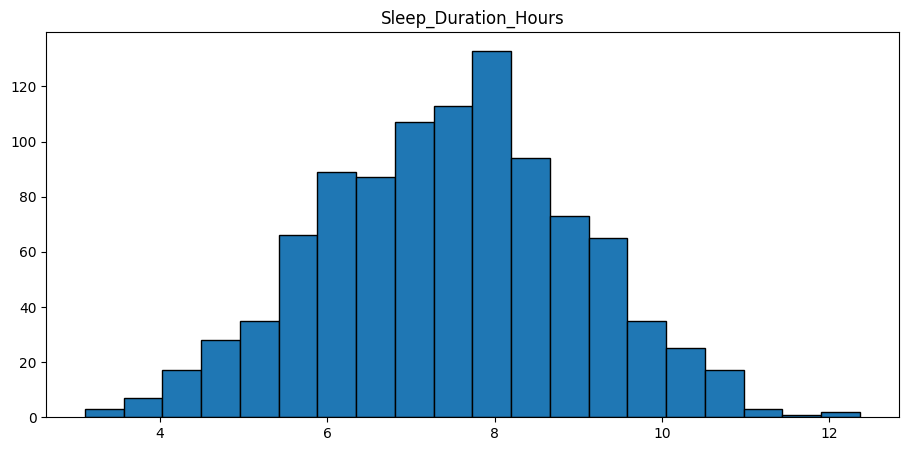

In [ ]:
feature = df.iloc[:, 3]
# визуализация
plt.figure(figsize=(11,5))
plt.hist(feature, bins=20, edgecolor='black')
plt.title('Sleep_Duration_Hours')
plt.show()

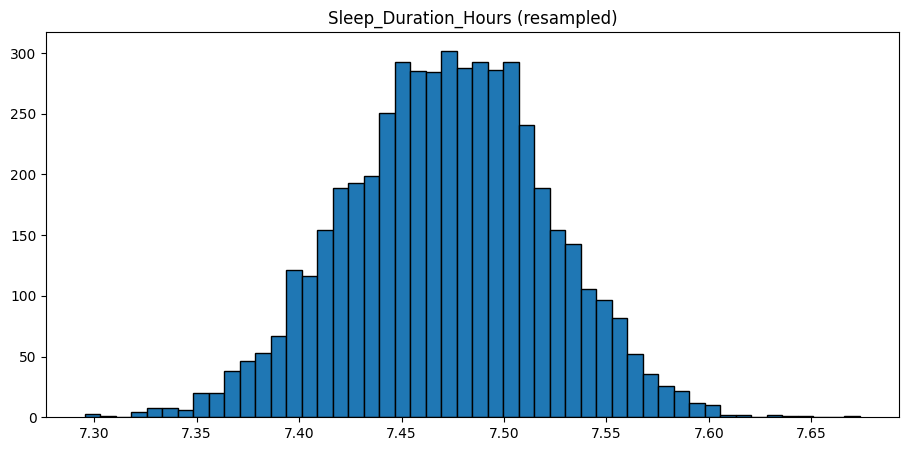

In [ ]:
n_bootstrap = 5000
# бутстреп
r = np.random.choice(feature, size=(len(feature), n_bootstrap))
rm = np.mean(r, axis=0)
# визуализация
plt.figure(figsize=(11,5))
plt.hist(rm, bins=50, edgecolor='black')
plt.title('Sleep_Duration_Hours (resampled)')
plt.show()

In [ ]:
fid1, fid2 = 0, 1

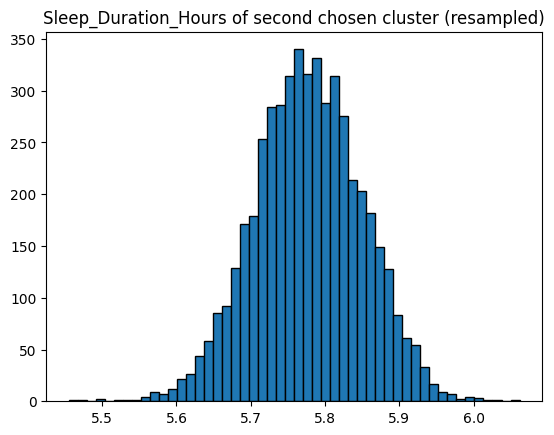

In [ ]:
fid1, fid2 = 0, 1
feature_1 = feature.values[np.where(label == fid1)]
# средние
r1 = r * np.isin(r, feature_1)
rm1 = np.sum(r1, axis=0) / np.count_nonzero(r1, axis=0)
rm1 = np.nan_to_num(rm1, nan=np.mean(rm1[~np.isnan(rm1)]))

feature_2 = feature.values[np.where(label == fid2)]
r2 = r * np.isin(r, feature_2)
rm2 = np.sum(r2, axis=0) / np.count_nonzero(r2, axis=0)
rm2 = np.nan_to_num(rm2, nan=np.mean(rm2[~np.isnan(rm2)]))

plt.hist(rm2, bins=50, edgecolor='black')
plt.title('Sleep_Duration_Hours of second chosen cluster (resampled)')
plt.show()

In [ ]:
def bootstrap(x, n_bootstrap=n_bootstrap):
 # pivotal
 mean_p = np.mean(x)
 std_p = np.std(x)
 lbord_p = mean_p - 1.96 * std_p
 rbord_p = mean_p + 1.96 * std_p
 confint_p = np.array([lbord_p, rbord_p])

 # non-pivotal
 x_sorted = np.sort(x)
 lbord_np = x_sorted[int(n_bootstrap * 0.025) + 1]
 rbord_np = x_sorted[int(n_bootstrap * 0.975)]
 confint_np = np.array([lbord_np, rbord_np])

 return confint_p, confint_np
# вывод
rm_confint_p, rm_confint_np = bootstrap(rm)
print('Feature mean: %.2f' % np.mean(feature))
print('Confidence interval (pivotal): %.2f, %.2f' % (rm_confint_p[0], rm_confint_p[1]))
print('Confidence interval (non-pivotal): %.2f, %.2f' % (rm_confint_np[0], rm_confint_np[1]))

Feature mean: 7.47
Confidence interval (pivotal): 7.38, 7.57
Confidence interval (non-pivotal): 7.37, 7.57


In [ ]:
rm1_rm2_confint_p, rm1_rm2_confint_np = bootstrap(rm1 - rm2)
print('Confidence interval (pivotal): %.2f, %.2f' %
(rm1_rm2_confint_p[0], rm1_rm2_confint_p[1]))
print('Confidence interval (non-pivotal): %.2f, %.2f' %
(rm1_rm2_confint_np[0], rm1_rm2_confint_np[1]))

Confidence interval (pivotal): 2.02, 2.53
Confidence interval (non-pivotal): 2.01, 2.54


In [ ]:
rm1_rm_confint_p, rm1_rm_confint_np = bootstrap(rm1 - rm)
print('Confidence interval (pivotal): %.2f, %.2f' %
(rm1_rm_confint_p[0], rm1_rm_confint_p[1]))
print('Confidence interval (nonpivotal): %.2f, %.2f' %
(rm1_rm_confint_np[0], rm1_rm_confint_np[1]))

Confidence interval (pivotal): 0.37, 0.79
Confidence interval (nonpivotal): 0.37, 0.80


# 5) Таблица сопряженности

In [ ]:
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


In [ ]:
df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.386641,36.535418,2.005834,7.471921,2.592946,148.260148,4.940956,0.504222,8.036684
std,19.584319,0.498727,0.983454,1.540699,2.979500,94.031760,2.032708,0.204137,2.023371
min,5.174653,35.029806,-1.019512,3.105827,1.000000,0.000000,0.000000,0.000000,0.326689
25%,57.048194,36.196879,1.352000,6.393869,1.000000,80.630719,3.489725,0.361569,6.726291
50%,70.506012,36.531539,1.999749,7.500277,1.000000,145.717293,4.890507,0.500996,8.038248
75%,82.958878,36.864441,2.660915,8.500418,2.537789,211.244685,6.399490,0.644680,9.354408
max,147.054630,38.096554,5.926238,12.364639,10.000000,400.000000,10.000000,1.000000,14.754766


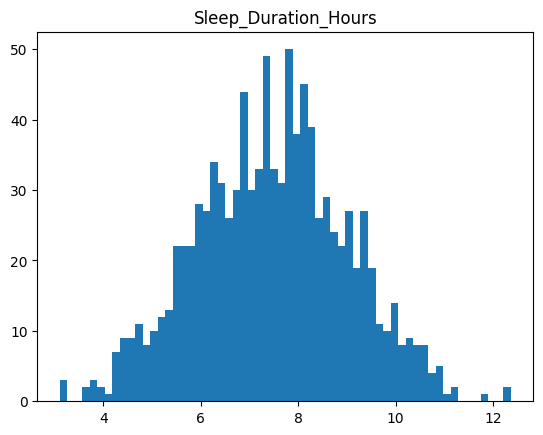

In [ ]:
f1 = df['Sleep_Duration_Hours']
plt.hist(f1, 60)
plt.title('Sleep_Duration_Hours')
plt.show()

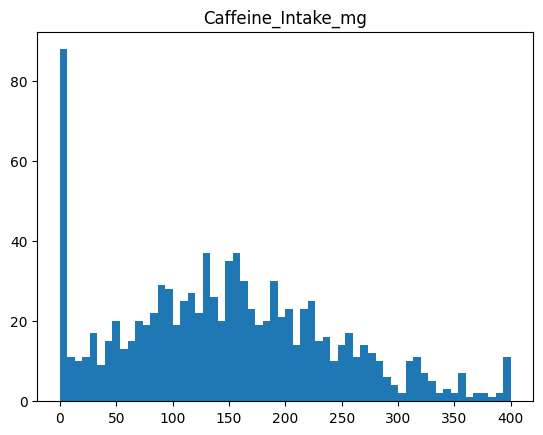

In [ ]:
f2 = df['Caffeine_Intake_mg']
plt.hist(f2, 60)
plt.title('Caffeine_Intake_mg')
plt.show()

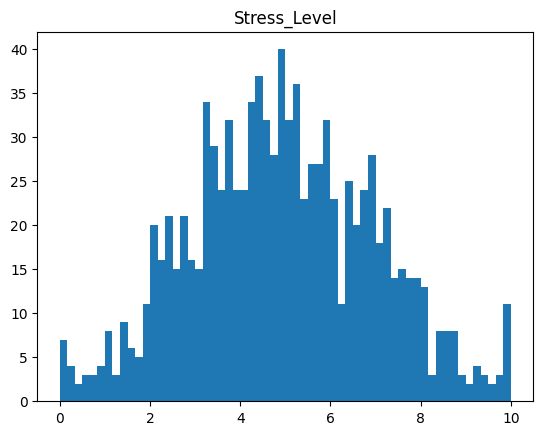

In [ ]:
f3 = df['Stress_Level']
plt.hist(f3, 60)
plt.title('Stress_Level')
plt.show()

(array([ 7.,  4.,  2.,  3.,  3.,  4.,  8.,  3.,  9.,  6.,  5., 11., 20.,
        16., 21., 15., 21., 16., 15., 34., 29., 24., 32., 24., 24., 34.,
        37., 32., 28., 40., 32., 36., 23., 27., 27., 32., 23., 11., 25.,
        20., 24., 28., 18., 22., 14., 15., 14., 14., 13.,  3.,  8.,  8.,
         8.,  3.,  2.,  4.,  3.,  2.,  3., 11.]),
 array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
         0.83333333,  1.        ,  1.16666667,  1.33333333,  1.5       ,
         1.66666667,  1.83333333,  2.        ,  2.16666667,  2.33333333,
         2.5       ,  2.66666667,  2.83333333,  3.        ,  3.16666667,
         3.33333333,  3.5       ,  3.66666667,  3.83333333,  4.        ,
         4.16666667,  4.33333333,  4.5       ,  4.66666667,  4.83333333,
         5.        ,  5.16666667,  5.33333333,  5.5       ,  5.66666667,
         5.83333333,  6.        ,  6.16666667,  6.33333333,  6.5       ,
         6.66666667,  6.83333333,  7.        ,  7.16666667,  7.33333333,
 

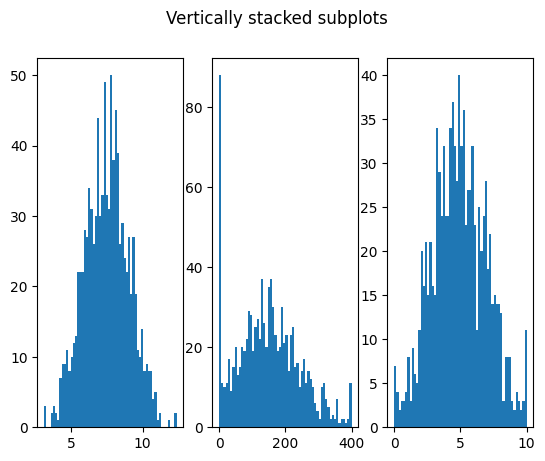

<Figure size 2000x500 with 0 Axes>

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.figure(figsize=(20,5))

fig.suptitle('Vertically stacked subplots')
ax1.hist(f1, 60)
ax2.hist(f2, 60)
ax3.hist(f3, 60)


In [ ]:
df_new = pd.DataFrame()
df_new

""


In [ ]:
df_new['Sleep_Duration_Hours'] = pd.cut(df['Sleep_Duration_Hours'], [-1, 6, 9, 13], labels = ['low', 'medium', 'high'])
df_new['Caffeine_Intake_mg'] = pd.cut(df['Caffeine_Intake_mg'], [-1, 148, 300, 1000], labels = ['low', 'medium', 'high'])
df_new['Stress_Level'] = pd.cut(df['Stress_Level'], [-1, 3, 6, 11], labels = ['low', 'medium', 'high'])

In [ ]:
df_new

,Sleep_Duration_Hours,Caffeine_Intake_mg,Stress_Level
0,low,low,low
1,medium,low,medium
2,medium,low,medium
3,high,low,medium
4,medium,medium,medium
...,...,...,...
995,medium,medium,medium
996,low,medium,high
997,medium,low,medium
998,high,medium,medium


In [ ]:
df_new.isna().sum()

Sleep_Duration_Hours    0
Caffeine_Intake_mg      0
Stress_Level            0
dtype: int64

Sleep_Duration_Hours и Caffeine_Intake_mg

In [ ]:
crosstab_1 = pd.crosstab(df_new['Sleep_Duration_Hours'], df_new['Caffeine_Intake_mg'], margins=True)
crosstab_1

Caffeine_Intake_mg,low,medium,high,All
Sleep_Duration_Hours,,,,
low,92,76,6,174
medium,333,275,45,653
high,85,71,17,173
All,510,422,68,1000


In [ ]:
relfreq_1 = pd.crosstab(df_new['Sleep_Duration_Hours'], df_new['Caffeine_Intake_mg'], margins=True, normalize=True)
relfreq_1.round(4)

Caffeine_Intake_mg,low,medium,high,All
Sleep_Duration_Hours,,,,
low,0.092,0.076,0.006,0.174
medium,0.333,0.275,0.045,0.653
high,0.085,0.071,0.017,0.173
All,0.510,0.422,0.068,1.000


Sleep_Duration_Hours и Stress_Level

In [ ]:
crosstab_2 = pd.crosstab(df_new['Sleep_Duration_Hours'], df_new['Stress_Level'], margins=True)
crosstab_2

Stress_Level,low,medium,high,All
Sleep_Duration_Hours,,,,
low,28,92,54,174
medium,118,338,197,653
high,28,100,45,173
All,174,530,296,1000


In [ ]:
relfreq_2 = pd.crosstab(df_new['Sleep_Duration_Hours'], df_new['Stress_Level'], margins=True, normalize=True)
relfreq_2.round(4)

Stress_Level,low,medium,high,All
Sleep_Duration_Hours,,,,
low,0.028,0.092,0.054,0.174
medium,0.118,0.338,0.197,0.653
high,0.028,0.100,0.045,0.173
All,0.174,0.530,0.296,1.000


In [ ]:
condfreq_1 = np.divide(crosstab_1, crosstab_1[-1:])
condfreq_1.round(4)

/tmp/ipykernel_4294/1024112935.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  condfreq_1 = np.divide(crosstab_1, crosstab_1[-1:])


Caffeine_Intake_mg,low,medium,high,All
Sleep_Duration_Hours,,,,
low,0.1804,0.1801,0.0882,0.174
medium,0.6529,0.6517,0.6618,0.653
high,0.1667,0.1682,0.2500,0.173
All,1.0000,1.0000,1.0000,1.000


In [ ]:
condfreq_2 = np.divide(crosstab_2, crosstab_2[-1:])
condfreq_2.round(4)

/tmp/ipykernel_4294/495640422.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  condfreq_2 = np.divide(crosstab_2, crosstab_2[-1:])


Stress_Level,low,medium,high,All
Sleep_Duration_Hours,,,,
low,0.1609,0.1736,0.1824,0.174
medium,0.6782,0.6377,0.6655,0.653
high,0.1609,0.1887,0.1520,0.173
All,1.0000,1.0000,1.0000,1.000


In [ ]:
relfreq_indep_1 = np.dot(relfreq_1.iloc[:,-1].values[:,None], relfreq_1.iloc[-1,:].values[None,:])

quetelet_1 = relfreq_1 / relfreq_indep_1 - 1 # матрица Кетле
quetelet_1 = quetelet_1.iloc[:-1, :-1]
quetelet_1.round(4)
m_1 = relfreq_1.iloc[:-1, :-1] * quetelet_1


In [ ]:
quetelet_1

Caffeine_Intake_mg,low,medium,high
Sleep_Duration_Hours,,,
low,0.036737,0.035028,-0.492901
medium,-0.000090,-0.002054,0.013422
high,-0.036609,-0.027477,0.445087


In [ ]:
np.sum(m_1.values)

0.005597452951665155

In [ ]:
relfreq_indep_2 = np.dot(relfreq_2.iloc[:,-1].values[:,None], relfreq_2.iloc[-1,:].values[None,:])

quetelet_2 = relfreq_2 / relfreq_indep_2 - 1 # матрица Кетле
quetelet_2 = quetelet_2.iloc[:-1, :-1]
quetelet_2.round(4)
m_2 = relfreq_2.iloc[:-1, :-1] * quetelet_2
np.sum(m_2.values)

In [ ]:
quetelet_2

Stress_Level,low,medium,high
Sleep_Duration_Hours,,,
low,-0.075175,-0.002386,0.048462
medium,0.038531,-0.023375,0.019205
high,-0.069829,0.090631,-0.121231


In [ ]:
np.sum(m_2.values)

0.0023742002809375336

In [ ]:
h_1 = (relfreq_1 - relfreq_indep_1)**2 / relfreq_indep_1
h_1 = h_1.iloc[:-1, :-1]
h_1.round(4)
np.sum(h_1.values)

h_2 = (relfreq_2 - relfreq_indep_2)**2 / relfreq_indep_2
h_2 = h_2.iloc[:-1, :-1]
h_2.round(4)
np.sum(h_2.values)

Caffeine_Intake_mg,low,medium,high
Sleep_Duration_Hours,,,
low,0.0001,0.0001,0.0029
medium,0.0000,0.0000,0.0000
high,0.0001,0.0001,0.0023


In [ ]:
np.sum(h_1.values)

0.005597452951665046

In [ ]:
h_2 = (relfreq_2 - relfreq_indep_2)**2 / relfreq_indep_2
h_2 = h_2.iloc[:-1, :-1]
h_2.round(4)
np.sum(h_2.values)

Stress_Level,low,medium,high
Sleep_Duration_Hours,,,
low,0.0002,0.0000,0.0001
medium,0.0002,0.0002,0.0001
high,0.0001,0.0008,0.0008


In [ ]:
np.sum(h_2.values)

0.0023742002809374664